In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# 라이브러리 셋팅
pd.set_option('display.max_columns', None)
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "AppleGothic"

<hr/>

## 데이터 로드

In [3]:
# 행복도 csv load
happy_df = pd.read_csv("csv/happiness.csv")
happy_df.head()

,구분별(1),구분별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,구분별(1),구분별(2),행복지수 종합,항목별 행복지수,항목별 행복지수,항목별 행복지수,항목별 행복지수,항목별 행복지수
1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
2,서울시,소계,6.7184596,7.2067965,6.1161352,6.7823744,6.8869873,6.6000048
3,성별,남성,6.7476923,7.2978792,6.1248071,6.7976944,6.8956674,6.6224135
4,성별,여성,6.6913339,7.1222786,6.1080883,6.7681586,6.8789328,6.5792112


In [4]:
# 공원율 csv load
park_df = pd.read_csv("csv/park.csv")
park_df.head()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6
0,자치구별(1),자치구별(2),행정구역면적,공원면적,공원면적,자연공원(국립)면적,도시자연공원구역면적,도시계획시설(공원) 및 기타공원,도시계획시설(공원) 및 기타공원
1,자치구별(1),자치구별(2),소계,소계,공원율 (%),소계,소계,조성면적,미조성면적
2,합계,소계,605208149,173024061,28.59,37517000,69221413,63708693,2576954
3,합계,종로구,23913162,11434590,47.82,5030000,3315969,3021205,67416
4,합계,중구,9960287,3206189,32.19,-,1789846,1389982,26362


In [5]:
# 1인당 공원면적 csv load
park_per_df = pd.read_csv("csv/park_per.csv")
park_per_df.head()

,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,자치구별(1),자치구별(2),공원,공원,도시공원,도시공원,도보생활권공원,도보생활권공원
1,자치구별(1),자치구별(2),면적 (천㎡),1인당 공원면적 (㎡),면적 (천㎡),1인당 공원면적 (㎡),면적 (천㎡),1인당 공원면적 (㎡)
2,합계,소계,173024.06,17.90,119335.16,12.34,55225.65,5.71
3,합계,종로구,11434.59,75.12,6236.64,40.97,3021.20,19.85
4,합계,중구,3206.19,24.51,3118.86,23.85,1389.98,10.63


In [102]:
# 공원개수 csv load
park_num_df = pd.read_excel("csv/park_num.xlsx", sheet_name=5)
park_num_df.head()

,Ⅱ. 구별 공원현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Ⅱ. 구별 공원현황.1,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1. 공원종류별 현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. 공원종류별 현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,구 별,합 계,NaN,NaN,도시자연공원구역,NaN,NaN,도시계획시설(공원),NaN,NaN,NaN,NaN,NaN,도시계획시설(공원),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,구 별,도시계획시설(공원),NaN,NaN,NaN,NaN,NaN,NaN,NaN,자연공원,NaN,NaN,기타공원,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,계,NaN,NaN,근 린 공 원,NaN,NaN,어린이공원,NaN,소공원,NaN,체육공원,NaN,묘지공원,NaN,문화공원,NaN,NaN,역사공원,NaN,수변공원,NaN,생태공원,NaN,가로공원,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,공원수\n(중복),NaN,면적(㎡),공원수\n(중복),NaN,면적(㎡),공원수\n(중복),NaN,면적(㎡),공원수\n(중복),NaN,면적(㎡),공원수,면적(㎡),공원수,면적(㎡),공원수,면적(㎡),공원수,면적(㎡),공원수,면적(㎡),NaN,공원수,면적(㎡),공원수,면적(㎡),공원수,면적(㎡),공원수,면적(㎡),공원수\n(중복),NaN,면적(㎡),공원수\n(중복),NaN,면적(㎡)
4,합 계,2979,56.0,173024060.52,68,19.0,69221413,2236,29.0,50113749.92,414,29.0,43345722.79,1248,2194940.65,447,682203.18,9,291537.4,4,1940878,68,846634.1,합 계,22,509036.4,14,227227,1,51146,9,24424.4,1,5.0,37517000,674,3.0,16171897.6


In [7]:
# 편의시설 csv load
facilities_df = pd.read_csv("csv/facilities.csv")
facilities_df.head()

,"Ⅰ. 기반시설, 조경시설, 휴양시설, 유희시설(총괄)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,"Ⅱ. 운동시설, 교양시설(총괄)",Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,"Ⅲ. 편익시설, 관리시설(총괄)",Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Ⅳ. 건물현황(총괄),Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,관 리 청 별,기 반 시 설,NaN,NaN,조 경 시 설,NaN,NaN,NaN,NaN,NaN,NaN,휴 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,유 희 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,운 동 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,운 동 시 설,NaN,NaN,NaN,NaN,교 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,편 익 시 설,NaN,NaN,NaN,NaN,NaN,편 익 시 설,NaN,NaN,NaN,NaN,NaN,NaN,관 리 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,적 법 건 물,NaN,부 적 격 건 물,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,광 장,도 로,산책등산로,관상용식수대,그늘\n시렁\n(개소),연 못,분수\n(기),조각\n(소),기 타,NaN,야영장\n야유회장,정 자(㎡),노인정(㎡),야외\n탁자\n(기),장의자\n(기),기 타,NaN,그네\n(기),미끄\n럼틀\n(기),모래\n밭\n(기),시소\n(기),정글\n짐\n(기),사닥\n다리\n(기),조합\n놀이\n(기),유료시설,NaN,기 타,NaN,NaN,운동장,테니스장,"수영장(실내,㎡)",수영장(실외),궁도\n장\n(소),야구\n장\n(소),축구\n장\n(소),농구\n장\n(소),배구\n장\n(소),배드민턴장,골프연습장,게이\n트볼\n(소),체력단련시설,NaN,기 타,NaN,동물원,식물원,도서관\n독서실,문화회관,야외\n음악당\n(소),동상\n(기),탑기\n념비\n(기),기 타,NaN,NaN,주 차 장,휴게음식점(식당),매 점,자판기,화장실(수세식),발효식\n화장실\n(기),간 이\n화장실\n(기),공중\n전화\n(기),음수대\n(기),샘터\n(소),시계탑\n(기),기 타,NaN,관리사무소,휀 스,공원등\n(기),안 내 판 (기),NaN,NaN,기 타,NaN,NaN,NaN,NaN,계,NaN,유 허 가,NaN,무 허 가,NaN,NaN,NaN
3,NaN,개소,노선,노선,개소,NaN,개소,NaN,NaN,종,기,개소,동,동,NaN,NaN,종,기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종,기,종,기,NaN,개소,개소,개소,개소,NaN,NaN,NaN,NaN,NaN,개소,개소,NaN,개소,기,종,기,개소,개소,개소,개소,NaN,NaN,NaN,종,기,NaN,개소,개소,개소,NaN,개소,NaN,NaN,NaN,NaN,NaN,NaN,종,기,개소,개소,NaN,종합,시설,기타,종,기,NaN,동,면적(㎡),동,면적(㎡),동,면적(㎡),동,면적(㎡),NaN,NaN
4,합 계,\t818,\t697,"\t1,418",\t925,"\t2,074",\t238,\t301,\t409,\t352,\t824,\t96,"\t1,965",\t216,"\t2,134","\t39,322",\t669,"\t3,402",\t849,\t144,\t392,\t525,\t36,\t13,"\t1,412",\t100,\t293,"\t1,400","\t2,740",합 계,\t132,"\t2,453",\t5,\t10,\t7,\t13,\t57,\t200,\t29,\t450,"\t3,785",\t116,"\t3,791","\t19,395","\t1,014","\t1,441",\t18,\t13,\t39,\t37,\t80,\t46,\t115,\t167,\t202,합 계,\t236,\t58,\t89,\t24,\t894,\t92,\t138,\t174,"\t1,346",\t203,\t69,\t66,\t490,\t268,"\t1,445","\t43,086","\t1,140","\t8,237","\t3,446",\t694,"\t4,410",합 계,"\t1,671","\t632,648.95","\t1,778","\t108,152.49",\t630,"\t49,141.25","\t2,166","\t144,661.79",NaN,NaN


<hr/>

## 전처리

### 행복도 df 전처리

In [8]:
happy_df.columns = happy_df.iloc[1]
happy_df.drop([0, 1], axis=0, inplace=True)
happy_df.reset_index(drop=True, inplace=True)

In [9]:
happy_df.head()

1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
0,서울시,소계,6.7184596,7.2067965,6.1161352,6.7823744,6.8869873,6.6000048
1,성별,남성,6.7476923,7.2978792,6.1248071,6.7976944,6.8956674,6.6224135
2,성별,여성,6.6913339,7.1222786,6.1080883,6.7681586,6.8789328,6.5792112
3,연령별,10대,6.9124685,7.6750149,5.783973,7.1061859,7.1429177,6.8542511
4,연령별,20대,6.9807589,7.7308668,6.0822969,7.1077906,7.0724683,6.9103721


In [10]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   구분별(1)         55 non-null     object
 1   구분별(2)         55 non-null     object
 2   소계             55 non-null     object
 3   자신의 건강상태       55 non-null     object
 4   자신의 재정상태       55 non-null     object
 5   주위 친지 친구와의 관계  55 non-null     object
 6   가정생활           55 non-null     object
 7   사회생활           55 non-null     object
dtypes: object(8)
memory usage: 3.6+ KB


In [11]:
# 컬럼 타입 변경
happy_df = happy_df.astype(
    {
        "소계": "float",
        "자신의 건강상태": "float",
        "자신의 재정상태": "float",
        "주위 친지 친구와의 관계": "float",
        "가정생활": "float",
        "사회생활": "float",
    }
)

In [12]:
happy_df.dtypes

1
구분별(1)            object
구분별(2)            object
소계               float64
자신의 건강상태         float64
자신의 재정상태         float64
주위 친지 친구와의 관계    float64
가정생활             float64
사회생활             float64
dtype: object

### 공원율 df 전처리

In [13]:
merged_row = park_df.iloc[0, 2:] + " " + park_df.iloc[1, 2:]
park_df.iloc[1, 2:] = merged_row
park_df.columns = park_df.iloc[1]
park_df.drop([0, 1], axis=0, inplace=True)
park_df.head()
park_df = park_df.iloc[1:-1, 1:5]
park_df = park_df.rename({"자치구별(2)":"자치구별"}, axis=1)
park_df = park_df.replace("-", "0")
park_df.reset_index(drop=True, inplace=True)

In [14]:
park_df.head()

1,자치구별,행정구역면적 소계,공원면적 소계,공원면적 공원율 (%)
0,종로구,23913162,11434590,47.82
1,중구,9960287,3206189,32.19
2,용산구,21867610,1773967,8.11
3,성동구,16820272,3083766,18.33
4,광진구,17062837,3459842,20.28


In [15]:
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구별          25 non-null     object
 1   행정구역면적 소계     25 non-null     object
 2   공원면적 소계       25 non-null     object
 3   공원면적 공원율 (%)  25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes


In [16]:
park_df = park_df.astype(
    {
        "행정구역면적 소계": "float",
        "공원면적 소계": "float",
        "공원면적 공원율 (%)": "float"
    }
)

In [17]:
park_df.dtypes

1
자치구별             object
행정구역면적 소계       float64
공원면적 소계         float64
공원면적 공원율 (%)    float64
dtype: object

### 1인당 공원면적 df 전처리

In [18]:
merged_row = park_per_df.iloc[0, 2:] + " " + park_per_df.iloc[1, 2:]
park_per_df.iloc[1, 2:] = merged_row
park_per_df.columns = park_per_df.iloc[1]
park_per_df.drop([0, 1], axis=0, inplace=True)
park_per_df = park_per_df.iloc[1:-1, 1:]
park_per_df.drop("공원 면적 (천㎡)", axis=1, inplace=True)
park_per_df.drop("도시공원 면적 (천㎡)", axis=1, inplace=True)
park_per_df.drop("도보생활권공원 면적 (천㎡)", axis=1, inplace=True)
park_per_df = park_per_df.rename({"자치구별(2)" : "자치구별"}, axis=1)
park_per_df.reset_index(drop=True, inplace=True)

In [19]:
park_per_df.head()

1,자치구별,공원 1인당 공원면적 (㎡),도시공원 1인당 공원면적 (㎡),도보생활권공원 1인당 공원면적 (㎡)
0,종로구,75.12,40.97,19.85
1,중구,24.51,23.85,10.63
2,용산구,7.60,3.25,6.91
3,성동구,10.70,4.27,10.08
4,광진구,9.85,8.52,3.85


In [20]:
park_per_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구별                  25 non-null     object
 1   공원 1인당 공원면적 (㎡)       25 non-null     object
 2   도시공원 1인당 공원면적 (㎡)     25 non-null     object
 3   도보생활권공원 1인당 공원면적 (㎡)  25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes


In [21]:
park_per_df = park_per_df.astype(
    {
        "공원 1인당 공원면적 (㎡)": "float",
        "도시공원 1인당 공원면적 (㎡)": "float",
        "도보생활권공원 1인당 공원면적 (㎡)": "float"
    }
)

In [22]:
park_per_df.dtypes

1
자치구별                     object
공원 1인당 공원면적 (㎡)         float64
도시공원 1인당 공원면적 (㎡)       float64
도보생활권공원 1인당 공원면적 (㎡)    float64
dtype: object

### 공원수 df 전처리

In [103]:
park_num_df.drop(park_num_df.columns[[2, 5, 8, 11, 23, 33, 36]], axis=1, inplace=True)
park_num_df = park_num_df.iloc[6:31, :]

park_num_df_columns = [
    "자치구별",
    "전체 공원수",
    "전체 공원면적(㎡)",
    "도시자연공원구역 공원수",
    "도시자연공원구역 면적(㎡)",
    "도시계획시설(공원) 공원수",
    "도시계획시설(공원) 면적(㎡)",
    "근린공원 공원수",
    "근린공원 면적(㎡)",
    "어린이공원 공원수",
    "어린이공원 면적(㎡)",
    "소공원 공원수",
    "소공원 면적(㎡)",
    "체육공원 공원수",
    "체육공원 면적(㎡)",
    "묘지공원 공원수",
    "묘지공원 면적(㎡)",
    "문화공원 공원수",
    "문화공원 면적(㎡)",
    "역사공원 공원수",
    "역사공원 면적(㎡)",
    "수변공원 공원수",
    "수변공원 면적(㎡)",
    "생태공원 공원수",
    "생태공원 면적(㎡)",
    "가로공원 공원수",
    "가로공원 면적(㎡)",
    "자연공원 공원수",
    "자연공원 면적(㎡)",
    "기타공원 공원수",
    "기타공원 면적(㎡)",
]

park_num_df.columns = park_num_df_columns

park_num_df.loc[park_num_df['자치구별'] == '중  구', '자치구별'] = "중구"
park_num_df.loc[park_num_df['자치구별'] == '동대문', '자치구별'] = "동대문구"
park_num_df.loc[park_num_df['자치구별'] == '서대문', '자치구별'] = "서대문구"
park_num_df.loc[park_num_df['자치구별'] == '영등포', '자치구별'] = "영등포구"

In [104]:
park_num_df.head()

,자치구별,전체 공원수,전체 공원면적(㎡),도시자연공원구역 공원수,도시자연공원구역 면적(㎡),도시계획시설(공원) 공원수,도시계획시설(공원) 면적(㎡),근린공원 공원수,근린공원 면적(㎡),어린이공원 공원수,어린이공원 면적(㎡),소공원 공원수,소공원 면적(㎡),체육공원 공원수,체육공원 면적(㎡),묘지공원 공원수,묘지공원 면적(㎡),문화공원 공원수,문화공원 면적(㎡),역사공원 공원수,역사공원 면적(㎡),수변공원 공원수,수변공원 면적(㎡),생태공원 공원수,생태공원 면적(㎡),가로공원 공원수,가로공원 면적(㎡),자연공원 공원수,자연공원 면적(㎡),기타공원 공원수,기타공원 면적(㎡)
6,종로구,106,11434590.4,3,3315969.2,66,2920667.6,23,2721138.9,20,55031.1,16,21902.8,0,0,0,0,3,9581.1,4,113013.7,0,0,0,0,0,0,0,5030000,37,167953.6
7,중구,72,3206189.49,1,1789845.8,56,1329016.4,3,1201434.9,16,31590,28,26093.5,1,29682.2,0,0,3,5795.7,5,34420.1,0,0,0,0,0,0,0,0,15,87327.29
8,용산구,107,1773967.16,0,54875.3,68,702647.56,6,555214.1,23,41328.86,28,47193.2,0,0,0,0,6,37920.5,3,17504.6,0,0,0,0,2,3486.3,0,0,39,1016444.3
9,성동구,100,3083766.47,1,72647.9,64,1158317.06,10,983902.1,32,55821.1,16,16600.36,1,2815.6,0,0,2,90366,0,0,0,0,0,0,3,8811.9,0,0,35,1852801.51
10,광진구,68,3459841.8,1,2097470,49,896461.1,1,837748.7,34,40594.2,13,14884.2,0,0,0,0,1,3234,0,0,0,0,0,0,0,0,0,0,18,465910.7


In [105]:
park_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 6 to 30
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   자치구별              25 non-null     object
 1   전체 공원수            25 non-null     object
 2   전체 공원면적(㎡)        25 non-null     object
 3   도시자연공원구역 공원수      25 non-null     object
 4   도시자연공원구역 면적(㎡)    25 non-null     object
 5   도시계획시설(공원) 공원수    25 non-null     object
 6   도시계획시설(공원) 면적(㎡)  25 non-null     object
 7   근린공원 공원수          25 non-null     object
 8   근린공원 면적(㎡)        25 non-null     object
 9   어린이공원 공원수         25 non-null     object
 10  어린이공원 면적(㎡)       25 non-null     object
 11  소공원 공원수           25 non-null     object
 12  소공원 면적(㎡)         25 non-null     object
 13  체육공원 공원수          25 non-null     object
 14  체육공원 면적(㎡)        25 non-null     object
 15  묘지공원 공원수          25 non-null     object
 16  묘지공원 면적(㎡)        25 non-null     object
 17  문화공원 공원수          

In [106]:
columns_to_exclude = ['자치구별']  # 제외할 열의 이름
columns_to_convert = park_num_df.columns.difference(columns_to_exclude)

park_num_df[columns_to_convert] = park_num_df[columns_to_convert].astype(float)

In [107]:
park_num_df.dtypes

자치구별                 object
전체 공원수              float64
전체 공원면적(㎡)          float64
도시자연공원구역 공원수        float64
도시자연공원구역 면적(㎡)      float64
도시계획시설(공원) 공원수      float64
도시계획시설(공원) 면적(㎡)    float64
근린공원 공원수            float64
근린공원 면적(㎡)          float64
어린이공원 공원수           float64
어린이공원 면적(㎡)         float64
소공원 공원수             float64
소공원 면적(㎡)           float64
체육공원 공원수            float64
체육공원 면적(㎡)          float64
묘지공원 공원수            float64
묘지공원 면적(㎡)          float64
문화공원 공원수            float64
문화공원 면적(㎡)          float64
역사공원 공원수            float64
역사공원 면적(㎡)          float64
수변공원 공원수            float64
수변공원 면적(㎡)          float64
생태공원 공원수            float64
생태공원 면적(㎡)          float64
가로공원 공원수            float64
가로공원 면적(㎡)          float64
자연공원 공원수            float64
자연공원 면적(㎡)          float64
기타공원 공원수            float64
기타공원 면적(㎡)          float64
dtype: object

### 편의시설 df 전처리

In [28]:
facilities_df.columns = facilities_df.iloc[1]
facilities_df = facilities_df.iloc[[2,3] + list(range(16, len(facilities_df))), :-11]

# \t, \n 삭제하는 함수
def remove_tab_newline(cell):
    if isinstance(cell, str):
        return cell.replace('\t', '').replace('\n', '')
    else:
        return cell

facilities_df = facilities_df.applymap(remove_tab_newline)

In [29]:
facilities_df.head()

1,관 리 청 별,기 반 시 설,NaN,NaN,조 경 시 설,NaN,NaN,NaN,NaN,NaN,NaN,휴 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,유 희 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,운 동 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,운 동 시 설,NaN,NaN,NaN,NaN,교 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관 리 청 별,편 익 시 설,NaN,NaN,NaN,NaN,NaN,편 익 시 설,NaN,NaN,NaN,NaN,NaN,NaN,관 리 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,광 장,도 로,산책등산로,관상용식수대,그늘시렁(개소),연 못,분수(기),조각(소),기 타,NaN,야영장야유회장,정 자(㎡),노인정(㎡),야외탁자(기),장의자(기),기 타,NaN,그네(기),미끄럼틀(기),모래밭(기),시소(기),정글짐(기),사닥다리(기),조합놀이(기),유료시설,NaN,기 타,NaN,NaN,운동장,테니스장,"수영장(실내,㎡)",수영장(실외),궁도장(소),야구장(소),축구장(소),농구장(소),배구장(소),배드민턴장,골프연습장,게이트볼(소),체력단련시설,NaN,기 타,NaN,동물원,식물원,도서관독서실,문화회관,야외음악당(소),동상(기),탑기념비(기),기 타,NaN,NaN,주 차 장,휴게음식점(식당),매 점,자판기,화장실(수세식),발효식화장실(기),간 이화장실(기),공중전화(기),음수대(기),샘터(소),시계탑(기),기 타,NaN,관리사무소,휀 스,공원등(기),안 내 판 (기),NaN,NaN,기 타,NaN
3,NaN,개소,노선,노선,개소,NaN,개소,NaN,NaN,종,기,개소,동,동,NaN,NaN,종,기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종,기,종,기,NaN,개소,개소,개소,개소,NaN,NaN,NaN,NaN,NaN,개소,개소,NaN,개소,기,종,기,개소,개소,개소,개소,NaN,NaN,NaN,종,기,NaN,개소,개소,개소,NaN,개소,NaN,NaN,NaN,NaN,NaN,NaN,종,기,개소,개소,NaN,종합,시설,기타,종,기
16,종 로 구,17,30,43,10,64,3,5,14,5,5,- 0,45,2,2,"1,386",16,94,5,2,10,3,1,- 0,24,- 0,- 0,19,32,종 로 구,6,3,- 0,- 0,1,- 0,- 0,3,- 0,13,- 0,- 0,43,748,46,106,- 0,- 0,2,- 0,1,9,24,8,7,종 로 구,1,3,2,1,40,- 0,6,20,43,16,- 0,- 0,- 0,11,34,987,72,81,159,8,28
17,중 구,33,27,21,- 0,18,2,6,1,1,12,- 0,31,2,- 0,505,4,13,11,2,2,10,2,1,17,- 0,- 0,15,30,중 구,- 0,1,- 0,- 0,- 0,- 0,1,- 0,- 0,3,- 0,2,62,205,- 0,- 0,- 0,- 0,2,1,1,2,3,2,2,중 구,6,- 0,- 0,- 0,10,- 0,1,4,26,- 0,2,- 0,- 0,6,14,448,16,22,10,8,56
18,용 산 구,17,7,11,4,42,25,7,5,5,17,- 0,34,7,28,614,13,20,19,2,4,4,- 0,- 0,34,- 0,- 0,30,59,용 산 구,2,2,- 0,- 0,- 0,- 0,- 0,1,- 0,5,- 0,3,85,455,1,1,- 0,- 0,- 0,1,56,3,2,3,3,용 산 구,5,- 0,1,- 0,17,- 0,- 0,3,18,- 0,1,1,1,5,56,728,14,33,76,3,12


In [30]:
# 관리청별 컬럼 하나만 남기기
facilities_df = facilities_df.rename({"관 리 청 별" : "자치구별"}, axis=1)
gu = facilities_df["자치구별"].iloc[2:, 0].str.replace(' ', '')
facilities_df = facilities_df.drop(columns=["자치구별"])
facilities_df = facilities_df.replace(",", "", regex=True).replace(" - 0", "0")
facilities_df = facilities_df.iloc[2:, :]
facilities_df = facilities_df.astype(int)

In [31]:
facilities_df.head()

1,기 반 시 설,NaN,NaN,조 경 시 설,NaN,NaN,NaN,NaN,NaN,NaN,휴 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,유 희 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,운 동 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,운 동 시 설,NaN,NaN,NaN,NaN,교 양 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,편 익 시 설,NaN,NaN,NaN,NaN,NaN,편 익 시 설,NaN,NaN,NaN,NaN,NaN,NaN,관 리 시 설,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,30,43,10,64,3,5,14,5,5,0,45,2,2,1386,16,94,5,2,10,3,1,0,24,0,0,19,32,6,3,0,0,1,0,0,3,0,13,0,0,43,748,46,106,0,0,2,0,1,9,24,8,7,1,3,2,1,40,0,6,20,43,16,0,0,0,11,34,987,72,81,159,8,28
17,33,27,21,0,18,2,6,1,1,12,0,31,2,0,505,4,13,11,2,2,10,2,1,17,0,0,15,30,0,1,0,0,0,0,1,0,0,3,0,2,62,205,0,0,0,0,2,1,1,2,3,2,2,6,0,0,0,10,0,1,4,26,0,2,0,0,6,14,448,16,22,10,8,56
18,17,7,11,4,42,25,7,5,5,17,0,34,7,28,614,13,20,19,2,4,4,0,0,34,0,0,30,59,2,2,0,0,0,0,0,1,0,5,0,3,85,455,1,1,0,0,0,1,56,3,2,3,3,5,0,1,0,17,0,0,3,18,0,1,1,1,5,56,728,14,33,76,3,12
19,18,17,6,2,38,2,3,1,4,6,0,70,7,12,1254,16,28,28,3,13,19,3,4,32,0,0,36,150,3,1,0,1,1,1,2,8,1,22,0,2,79,611,5,14,0,0,1,1,0,0,0,0,0,4,0,0,1,18,0,5,1,49,0,4,2,2,5,51,933,44,28,32,8,21
20,14,8,8,0,16,4,2,3,0,0,2,44,7,52,613,7,48,31,4,11,23,0,0,44,0,0,34,67,7,1,0,0,0,0,1,2,1,7,0,2,178,363,7,7,0,0,0,0,1,0,3,0,0,4,1,1,0,24,0,4,0,22,1,0,0,0,4,41,579,49,63,62,12,25


In [32]:
notna_cols = [idx for idx, col in enumerate(facilities_df.columns) if pd.notna(col)]
notna_cols

[0, 3, 10, 17, 28, 39, 44, 53, 59, 66]

In [33]:
notna = [col.replace(" ", "") for _, col in enumerate(facilities_df.columns) if pd.notna(col)]
notna

['기반시설',
 '조경시설',
 '휴양시설',
 '유희시설',
 '운동시설',
 '운동시설',
 '교양시설',
 '편익시설',
 '편익시설',
 '관리시설']

In [34]:
sum_results = []

for i in range(len(notna_cols)-1):
    sum_result = facilities_df.iloc[:, notna_cols[i]:notna_cols[i+1]].sum(axis=1)
    sum_results.append(sum_result)
sum_result = facilities_df.iloc[:, notna_cols[-1]:].sum(axis=1)
sum_results.append(sum_result)

sum_facilities_df = pd.DataFrame(sum_results)
sum_facilities_df = sum_facilities_df.T
sum_facilities_df.columns = notna
sum_facilities_df.head()

,기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설
16,90,106,1545,96,26,943,51,47,85,1380
17,81,40,555,90,5,269,13,16,33,580
18,35,105,716,152,10,545,68,23,24,927
19,41,56,1387,288,40,711,2,23,63,1122
20,30,25,773,214,19,557,4,30,27,835


In [35]:
facilities_df = pd.concat([gu.reset_index(drop=True), sum_facilities_df.reset_index(drop=True)], axis=1)
facilities_df['전체 편의시설'] = facilities_df.select_dtypes(include='int').sum(axis=1)
facilities_df.head()

,자치구별,기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설
0,종로구,90,106,1545,96,26,943,51,47,85,1380
1,중구,81,40,555,90,5,269,13,16,33,580
2,용산구,35,105,716,152,10,545,68,23,24,927
3,성동구,41,56,1387,288,40,711,2,23,63,1122
4,광진구,30,25,773,214,19,557,4,30,27,835


<hr/>

## EDA

### 행복도 df EDA

In [55]:
happy_df.head()

1,구분별(1),구분별(2),소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
0,서울시,소계,6.718460,7.206797,6.116135,6.782374,6.886987,6.600005
1,성별,남성,6.747692,7.297879,6.124807,6.797694,6.895667,6.622414
2,성별,여성,6.691334,7.122279,6.108088,6.768159,6.878933,6.579211
3,연령별,10대,6.912469,7.675015,5.783973,7.106186,7.142918,6.854251
4,연령별,20대,6.980759,7.730867,6.082297,7.107791,7.072468,6.910372


In [58]:
# 소분류 개수 확인
happy_df.groupby('구분별(1)')['구분별(2)'].nunique()

구분별(1)
서울시       1
성별        2
소득별       5
연령별       6
지역대분류     5
지역소분류    25
직업분류      4
학력별       4
혼인상태별     3
Name: 구분별(2), dtype: int64

In [71]:
# 대분류별 데이터 프레임 생성
gender_df = happy_df[happy_df["구분별(1)"] == "성별"]
age_df = happy_df[happy_df["구분별(1)"] == "연령별"]
edu_df = happy_df[happy_df["구분별(1)"] == "학력별"]
income_df = happy_df[happy_df["구분별(1)"] == "소득별"]
marital_df = happy_df[happy_df["구분별(1)"] == "혼인상태별"]
region_df = happy_df[happy_df["구분별(1)"] == "지역대분류"]
regionsub_df = happy_df[happy_df["구분별(1)"] == "지역소분류"]
job_df = happy_df[happy_df["구분별(1)"] == "직업분류"]

happy_df_list = [
    gender_df,
    age_df,
    edu_df,
    income_df,
    marital_df,
    region_df,
    regionsub_df,
    job_df,
]

In [72]:
# barplot 그리는 함수
def barplot_visualization(df) -> None:
    fig, ax = plt.subplots(figsize=(12, 4))
    df_melted = df.melt(
        id_vars=["구분별(1)", "구분별(2)"], var_name="Factors", value_name="Happiness"
    )
    sns.barplot(
        data=df_melted, x="Factors", y="Happiness", hue="구분별(2)", palette="coolwarm"
    )
    plt.xlabel("Factors")
    plt.ylabel("Happiness")
    plt.xticks(fontsize=8)
    plt.legend(bbox_to_anchor=(1, 0.5), fontsize=8)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
            "{:.2f}".format(p.get_height()),
            fontsize=7,
            color="black",
            ha="center",
            va="bottom",
        )
    plt.show()

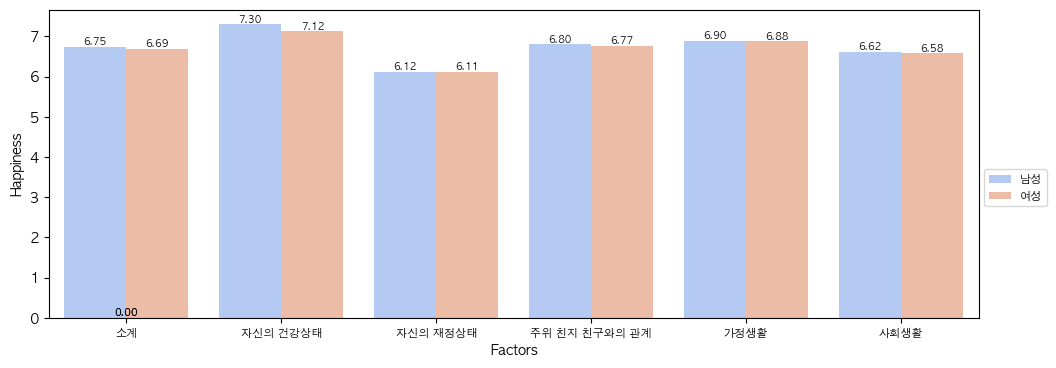

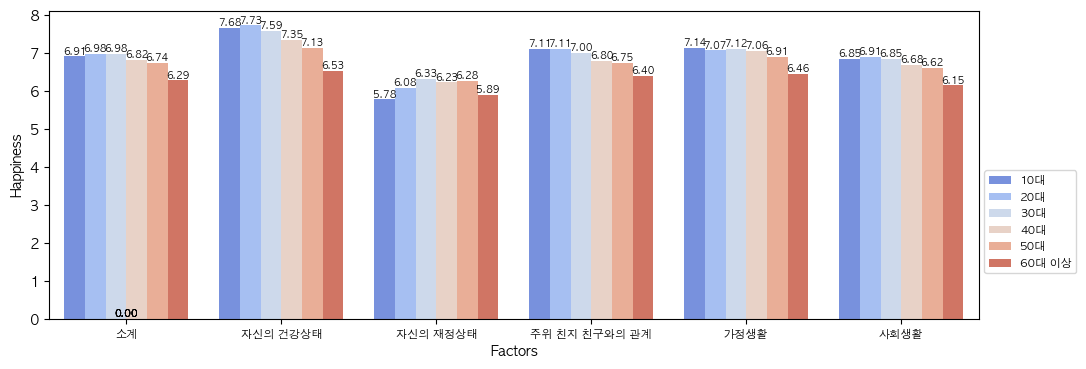

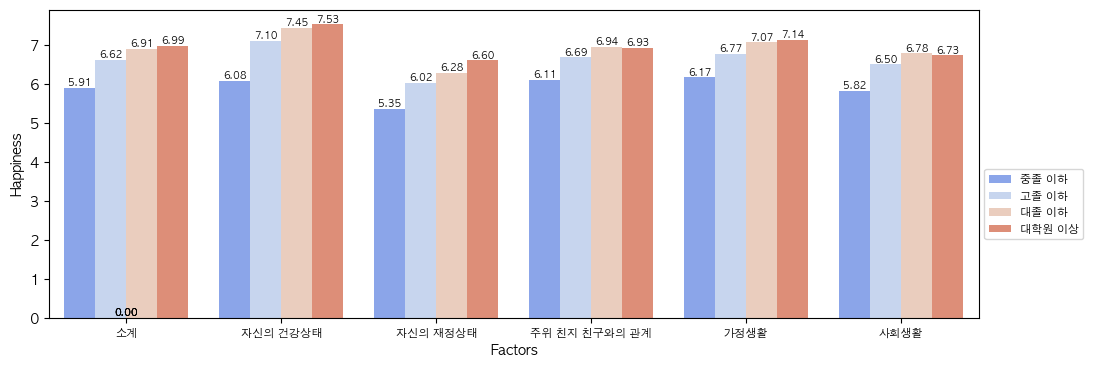

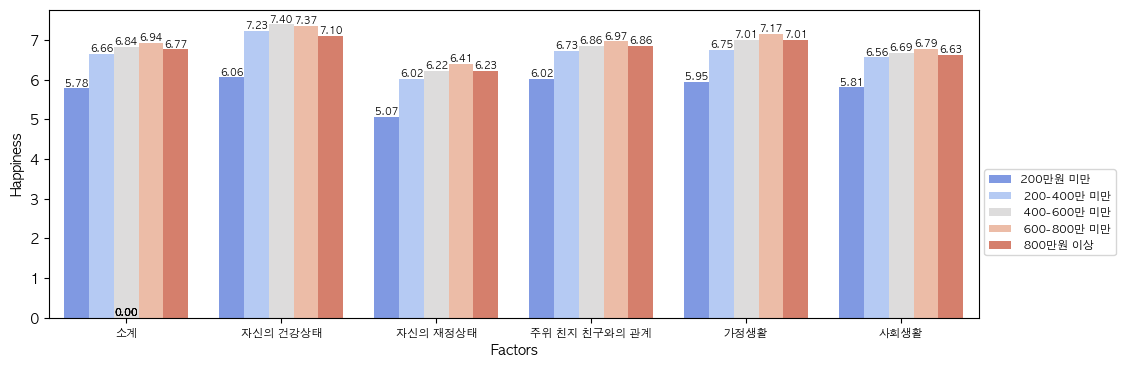

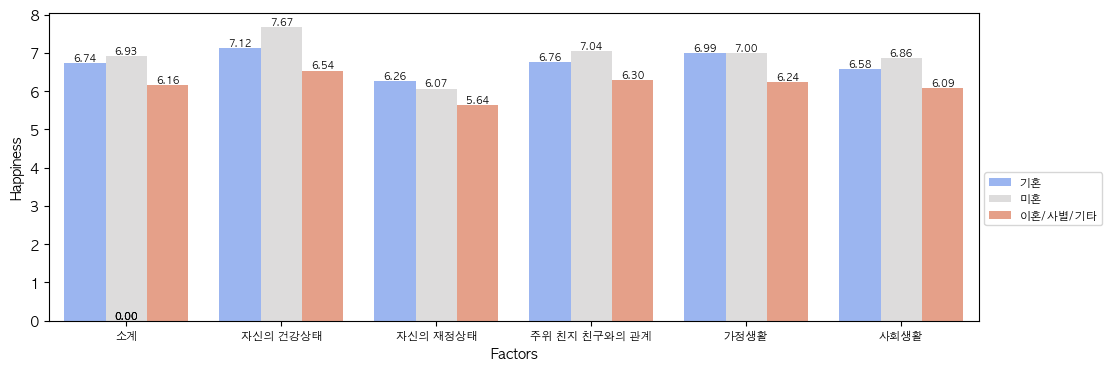

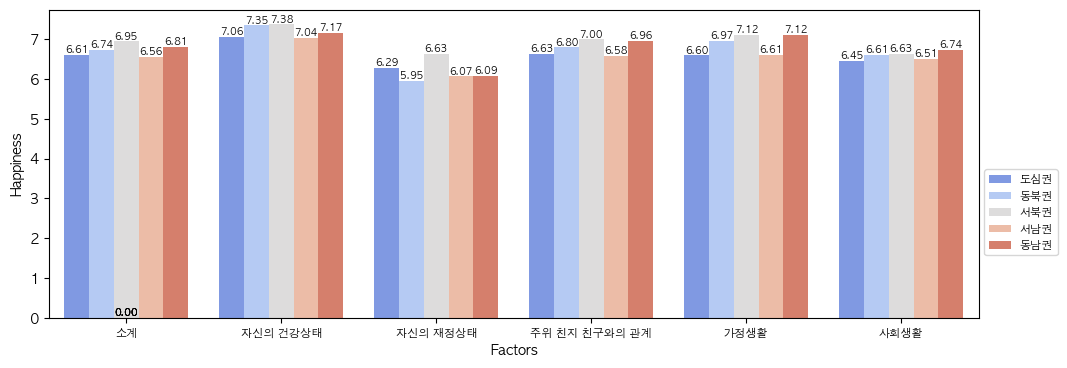

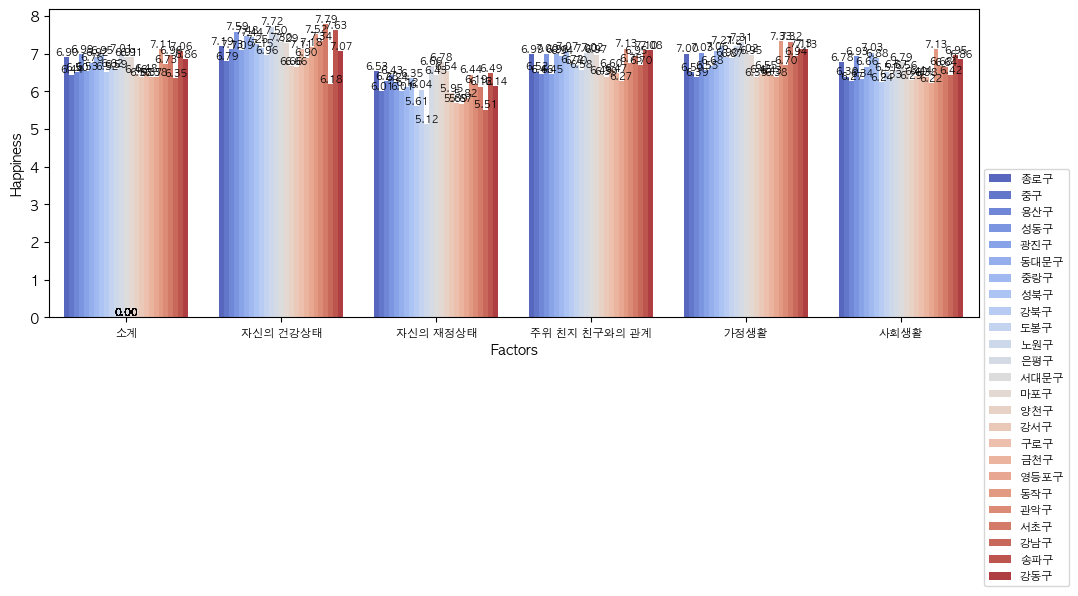

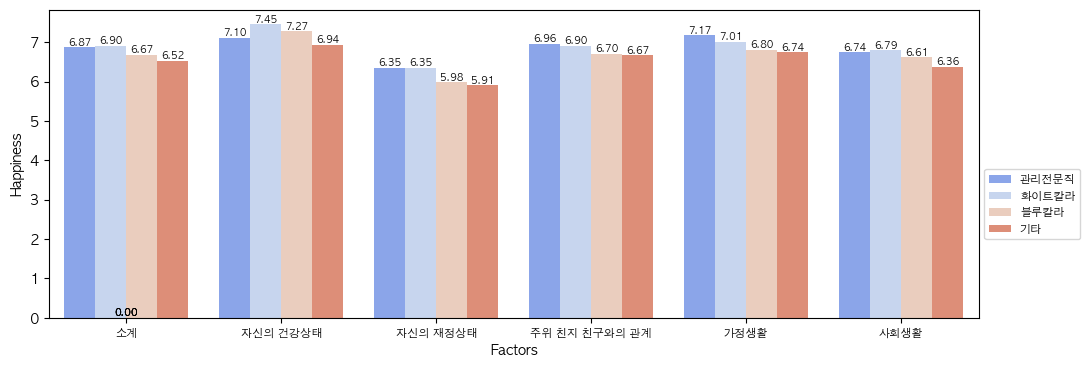

In [73]:
# 대분류별 시각화
for df in happy_df_list:
    barplot_visualization(df)

In [75]:
regionsub_df = happy_df[happy_df["구분별(1)"] == "지역소분류"]
regionsub_df.describe()

1,소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.707810,7.196177,6.126654,6.771547,6.857804,6.586867
std,0.254015,0.370396,0.395785,0.268196,0.326874,0.268819
min,6.351689,6.183954,5.124857,6.273871,6.384812,6.220873
25%,6.478336,7.072539,5.946303,6.521418,6.550674,6.383831
50%,6.731845,7.194778,6.135411,6.750894,6.940409,6.563359
75%,6.917258,7.476093,6.431605,6.997934,7.130365,6.785199
max,7.111576,7.789978,6.778209,7.134236,7.334752,7.126666


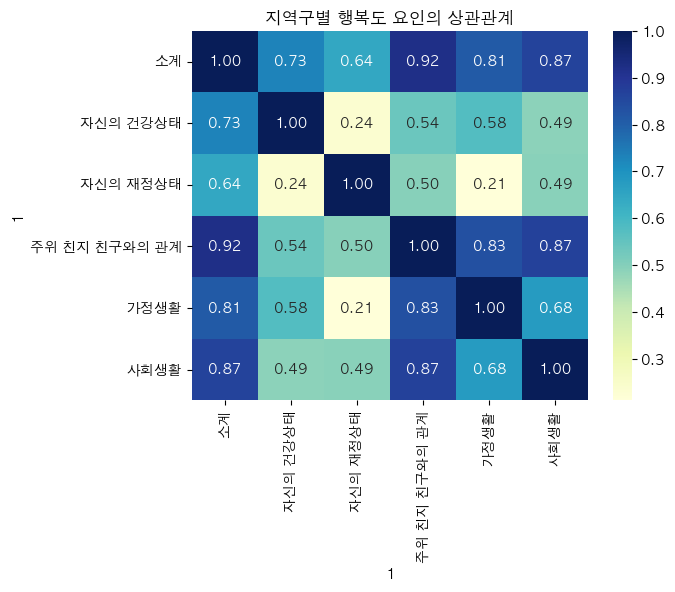

In [76]:
# regionsub_df의 상관 행렬 계산
correlation_matrix = regionsub_df.iloc[:, 2:].corr()

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('지역구별 행복도 요인의 상관관계')
plt.show()

In [81]:
# 지역별 > 요인별 상세
def regionsub_detail(regionsub_df, factor) -> None:
    fig, ax = plt.subplots(figsize=(12, 4))

    # 소계 열을 기준으로 데이터프레임 정렬
    regionsub_df_sorted = regionsub_df.sort_values(by=f"{factor}", ascending=False)

    df_melted = regionsub_df_sorted.melt(
        id_vars=["구분별(1)", "구분별(2)"], var_name="Factors", value_name="Happiness"
    )

    # "Factors" 열이 "소계"인 행만 필터링
    df_melted_subtotal = df_melted[df_melted["Factors"] == f"{factor}"]

    sns.barplot(
        data=df_melted_subtotal, x="Factors", y="Happiness", hue="구분별(2)", palette="coolwarm"
    )
    plt.xlabel("Factors")
    plt.ylabel("Happiness")
    plt.xticks(fontsize=8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
            "{:.2f}".format(p.get_height()),
            fontsize=7,
            color="black",
            ha="center",
            va="bottom",
        )
    plt.show()

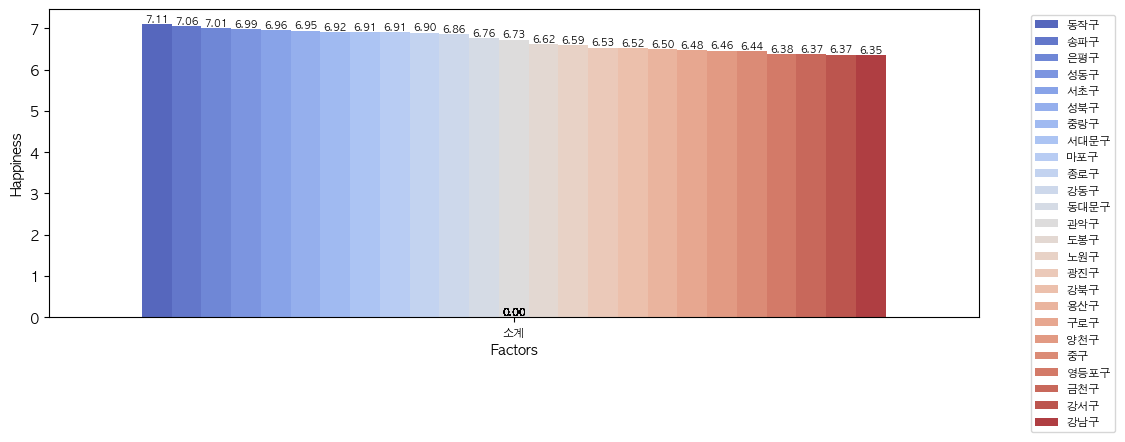

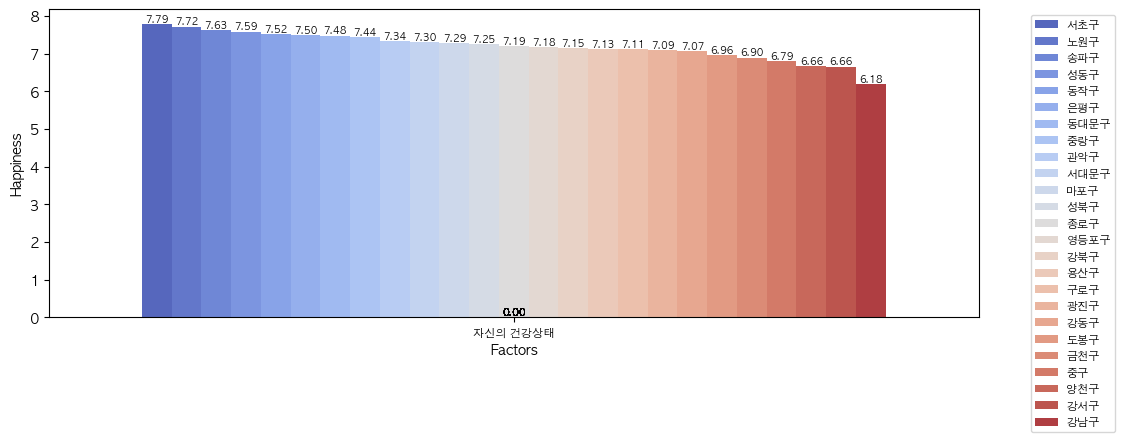

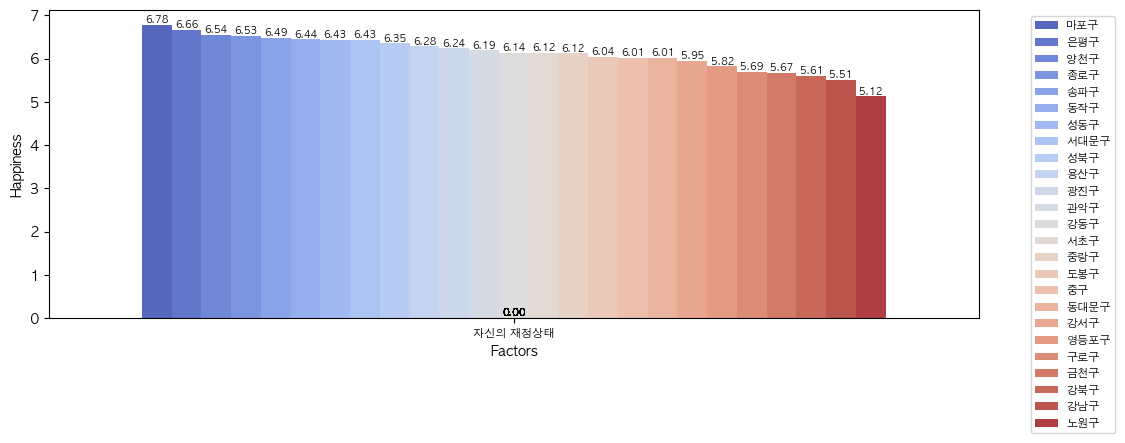

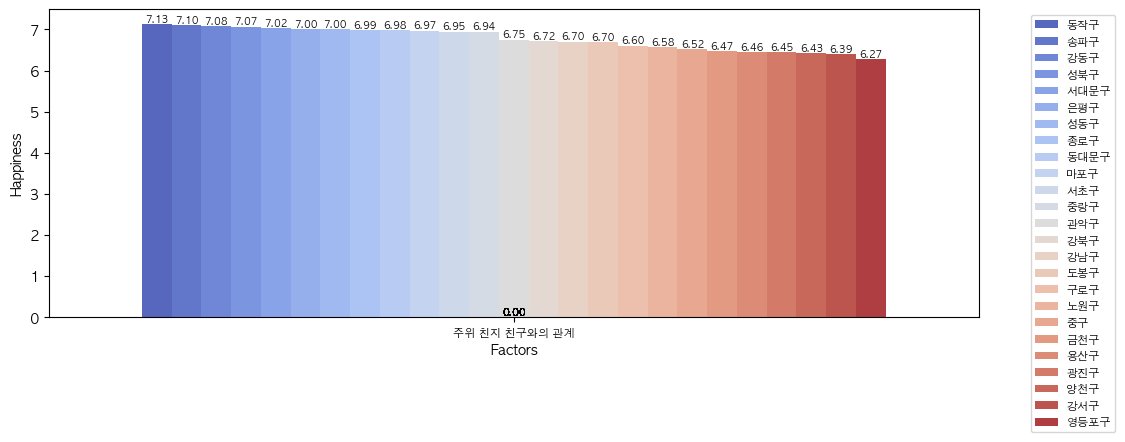

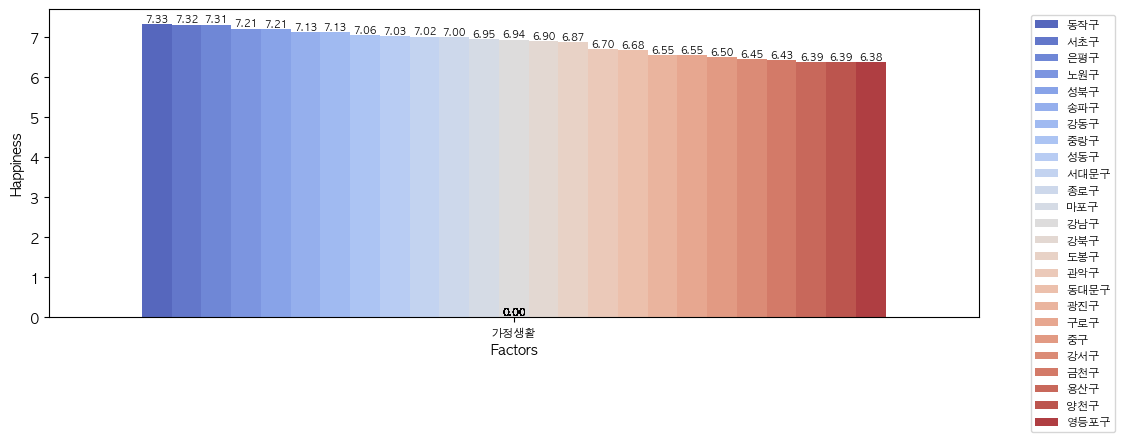

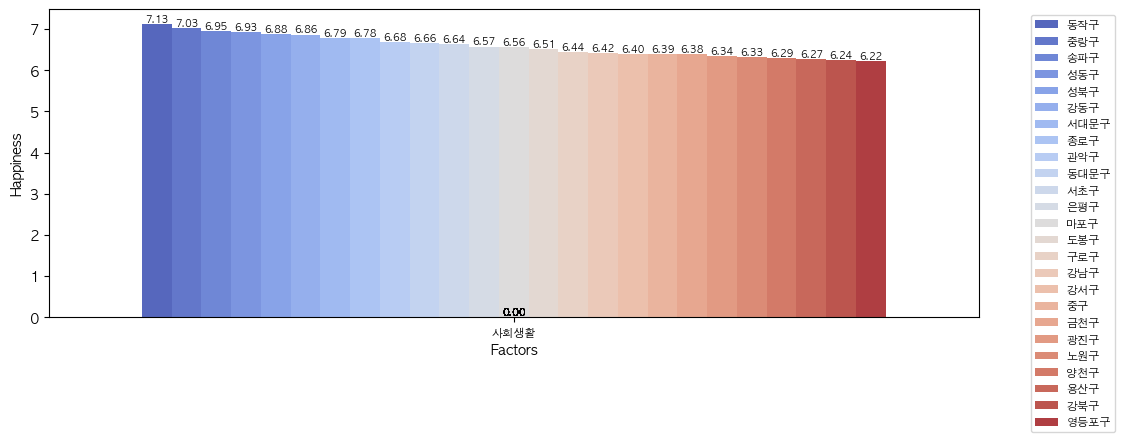

In [82]:
factors = ["소계", "자신의 건강상태", "자신의 재정상태", "주위 친지 친구와의 관계", "가정생활", "사회생활"]

for factor in factors:
    regionsub_detail(regionsub_df, factor)

### 공원 데이터 df EDA

In [87]:
park_df.head()

1,자치구별,행정구역면적 소계,공원면적 소계,공원면적 공원율 (%)
0,종로구,23913162.0,11434590.0,47.82
1,중구,9960287.0,3206189.0,32.19
2,용산구,21867610.0,1773967.0,8.11
3,성동구,16820272.0,3083766.0,18.33
4,광진구,17062837.0,3459842.0,20.28


In [88]:
park_df.describe()

1,행정구역면적 소계,공원면적 소계,공원면적 공원율 (%)
count,2.500000e+01,2.500000e+01,25.000000
mean,2.420833e+07,6.654162e+06,27.044800
std,9.312006e+06,4.575925e+06,14.543107
min,9.960287e+06,1.215385e+06,8.110000
25%,1.740569e+07,3.206189e+06,17.520000
50%,2.360040e+07,4.569418e+06,21.310000
75%,2.956831e+07,1.015104e+07,34.690000
max,4.696802e+07,1.507203e+07,61.420000


In [89]:
park_per_df.head()

1,자치구별,공원 1인당 공원면적 (㎡),도시공원 1인당 공원면적 (㎡),도보생활권공원 1인당 공원면적 (㎡)
0,종로구,75.12,40.97,19.85
1,중구,24.51,23.85,10.63
2,용산구,7.60,3.25,6.91
3,성동구,10.70,4.27,10.08
4,광진구,9.85,8.52,3.85


In [91]:
park_per_df.describe()

1,공원 1인당 공원면적 (㎡),도시공원 1인당 공원면적 (㎡),도보생활권공원 1인당 공원면적 (㎡)
count,25.000000,25.000000,25.000000
mean,19.095600,12.370000,6.201600
std,16.277969,10.384122,3.702291
min,3.440000,1.650000,2.320000
25%,7.860000,5.920000,3.850000
50%,12.170000,8.670000,4.970000
75%,24.910000,14.020000,6.900000
max,75.120000,40.970000,19.850000


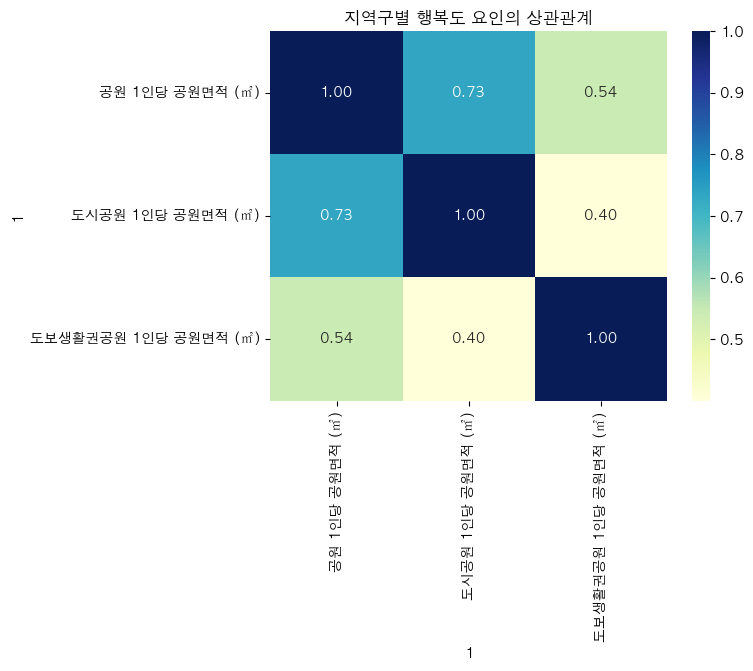

In [99]:
# park_per_df의 상관 행렬 계산
correlation_matrix = park_per_df.iloc[:, 1:].corr()

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('지역구별 행복도 요인의 상관관계')
plt.show()

In [85]:
geo_data = {
        '지역': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
                '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
                '관악구', '서초구', '강남구', '송파구', '강동구'],
        '위도': [37.5730, 37.5647, 37.5314, 37.5635, 37.5420, 37.5744, 37.5975, 37.5891, 
                37.6418, 37.6688, 37.6552, 37.6026, 37.5651, 37.5549, 37.5171, 37.5510,
                37.4945, 37.4594, 37.5192, 37.5121, 37.4784, 37.4837, 37.4834, 37.4954, 37.5045],
        '경도': [126.9794, 126.9895, 126.9646, 127.0365, 127.0838, 127.0400, 127.0928, 127.0182,
                127.0146, 127.0458, 127.0778, 126.9294, 126.9385, 126.9058, 126.8663, 126.8495,
                126.8860, 126.8970, 126.8979, 126.9165, 126.9828, 126.9528, 127.0324, 127.1098, 127.0982]
        }

geo_df = pd.DataFrame(geo_data)

In [ ]:
# 서울 중심에 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 마커 생성
for idx, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=park_df.loc[idx]["공원면적 공원율 (%)"],
        color="green",
        fill_color="green",
        fill_opacity=0.3,
        popup=f"{row['지역']} : {park_df.loc[idx, '공원면적 공원율 (%)']}%",
    ).add_to(seoul_map)

    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=park_per_df.loc[idx]["공원 1인당 공원면적 (㎡)"],
        color="blue",
        fill_color="blue",
        fill_opacity=0.3,
        popup=f"{row['지역']} : {park_per_df.loc[idx, '공원 1인당 공원면적 (㎡)']}%",
    ).add_to(seoul_map)

# 지도 표시
seoul_map

In [100]:
park_num_df.head()

,자치구별,전체 공원수,전체 공원면적(㎡),도시자연공원구역 공원수,도시자연공원구역 면적(㎡),도시계획시설(공원) 공원수,도시계획시설(공원) 면적(㎡),근린공원 공원수,근린공원 면적(㎡),어린이공원 공원수,어린이공원 면적(㎡),소공원 공원수,소공원 면적(㎡),체육공원 공원수,체육공원 면적(㎡),묘지공원 공원수,묘지공원 면적(㎡),문화공원 공원수,문화공원 면적(㎡),역사공원 공원수,역사공원 면적(㎡),수변공원 공원수,수변공원 면적(㎡),생태공원 공원수,생태공원 면적(㎡),가로공원 공원수,가로공원 면적(㎡),자연공원 공원수,자연공원 면적(㎡),기타공원 공원수,기타공원 면적(㎡)
5,계,2978.0,1.663541e+08,68.0,69221413.0,2235.0,43443749.92,413.0,36675722.79,1248.0,2194940.65,447.0,682203.18,9.0,291537.4,4.0,1940878.0,68.0,846634.1,22.0,509036.4,14.0,227227.0,1.0,51146.0,9.0,24424.4,1.0,37517000.0,674.0,16171897.60
6,종로구,106.0,1.143459e+07,3.0,3315969.2,66.0,2920667.60,23.0,2721138.90,20.0,55031.10,16.0,21902.80,0.0,0.0,0.0,0.0,3.0,9581.1,4.0,113013.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5030000.0,37.0,167953.60
7,중구,72.0,3.206189e+06,1.0,1789845.8,56.0,1329016.40,3.0,1201434.90,16.0,31590.00,28.0,26093.50,1.0,29682.2,0.0,0.0,3.0,5795.7,5.0,34420.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,87327.29
8,용산구,107.0,1.773967e+06,0.0,54875.3,68.0,702647.56,6.0,555214.10,23.0,41328.86,28.0,47193.20,0.0,0.0,0.0,0.0,6.0,37920.5,3.0,17504.6,0.0,0.0,0.0,0.0,2.0,3486.3,0.0,0.0,39.0,1016444.30
9,성동구,100.0,3.083766e+06,1.0,72647.9,64.0,1158317.06,10.0,983902.10,32.0,55821.10,16.0,16600.36,1.0,2815.6,0.0,0.0,2.0,90366.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8811.9,0.0,0.0,35.0,1852801.51


In [108]:
park_num_df.describe()

,전체 공원수,전체 공원면적(㎡),도시자연공원구역 공원수,도시자연공원구역 면적(㎡),도시계획시설(공원) 공원수,도시계획시설(공원) 면적(㎡),근린공원 공원수,근린공원 면적(㎡),어린이공원 공원수,어린이공원 면적(㎡),소공원 공원수,소공원 면적(㎡),체육공원 공원수,체육공원 면적(㎡),묘지공원 공원수,묘지공원 면적(㎡),문화공원 공원수,문화공원 면적(㎡),역사공원 공원수,역사공원 면적(㎡),수변공원 공원수,수변공원 면적(㎡),생태공원 공원수,생태공원 면적(㎡),가로공원 공원수,가로공원 면적(㎡),자연공원 공원수,자연공원 면적(㎡),기타공원 공원수,기타공원 면적(㎡)
count,25.000000,2.500000e+01,25.000000,2.500000e+01,25.000000,2.500000e+01,25.000000,2.500000e+01,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00,25.00,25.00000,25.000000,25.00,2.500000e+01,25.00000,2.500000e+01
mean,119.120000,6.654162e+06,2.720000,2.768857e+06,89.400000,1.737750e+06,16.520000,1.467029e+06,49.920000,87797.626000,17.88000,27288.127200,0.360000,11661.496000,0.160000,7.763512e+04,2.720000,33865.364000,0.880000,20361.456000,0.560000,9089.080000,0.04,2045.84,0.36000,976.976000,0.04,1.500680e+06,26.96000,6.468759e+05
std,36.352808,4.575925e+06,2.282542,3.704816e+06,35.086797,8.043002e+05,15.229139,6.652190e+05,26.094252,44901.909309,7.44043,14223.347343,0.568624,23932.737193,0.374166,2.943855e+05,2.208318,55503.234358,1.363818,37259.187495,1.157584,27714.444011,0.20,10229.20,0.81035,2238.704329,0.20,3.306695e+06,12.53156,7.387140e+05
min,55.000000,1.215385e+06,0.000000,2.159300e+03,47.000000,3.997729e+05,1.000000,3.357861e+05,16.000000,31590.000000,2.00000,4910.230000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.000000e+00,8.00000,2.048880e+04
25%,92.000000,3.206189e+06,1.000000,3.352578e+05,66.000000,1.158317e+06,6.000000,9.839021e+05,34.000000,54966.400000,14.00000,17105.200000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,4329.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.000000e+00,16.00000,1.639784e+05
50%,114.000000,4.569418e+06,3.000000,1.789846e+06,74.000000,1.789714e+06,11.000000,1.436246e+06,42.000000,77137.700000,17.00000,23536.500000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,11424.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.000000e+00,28.00000,3.337696e+05
75%,136.000000,1.015104e+07,4.000000,3.315969e+06,105.000000,2.150525e+06,23.000000,1.862891e+06,62.000000,111676.500000,23.00000,35252.090000,1.000000,12813.000000,0.000000,0.000000e+00,3.000000,37920.500000,1.000000,17504.600000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.000000e+00,37.00000,1.016444e+06
max,187.000000,1.507203e+07,9.000000,1.279882e+07,160.000000,3.563811e+06,61.000000,2.826646e+06,120.000000,191794.400000,33.00000,52837.750000,2.000000,101755.600000,1.000000,1.445069e+06,9.000000,246282.300000,5.000000,113013.700000,4.000000,132050.100000,1.00,51146.00,3.00000,8811.900000,1.00,1.198500e+07,49.00000,2.674281e+06


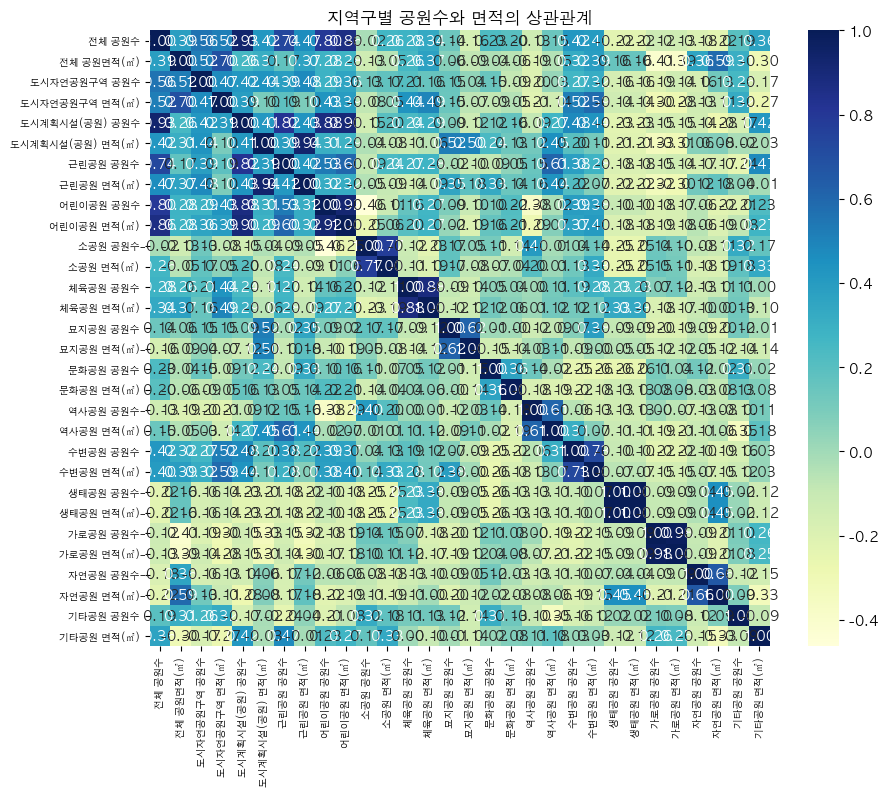

In [127]:
# park_num_df의 상관 행렬 계산
plt.figure(figsize=(10, 8))
correlation_matrix = park_num_df.iloc[:, 1:].corr()

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('지역구별 공원수와 면적의 상관관계')
plt.xticks(fontsize=7)  # x축 눈금 폰트 크기 조정
plt.yticks(fontsize=7)  # y축 눈금 폰트 크기 조정
plt.show()

In [118]:
facilities_df.head()

,자치구별,기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설
0,종로구,90,106,1545,96,26,943,51,47,85,1380
1,중구,81,40,555,90,5,269,13,16,33,580
2,용산구,35,105,716,152,10,545,68,23,24,927
3,성동구,41,56,1387,288,40,711,2,23,63,1122
4,광진구,30,25,773,214,19,557,4,30,27,835


In [119]:
facilities_df.describe()

,기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
mean,82.320000,145.520000,1487.640000,295.720000,278.280000,929.560000,22.12000,35.960000,75.560000,1426.040000
std,73.423271,116.185957,734.868235,161.713615,883.401406,388.956197,23.85428,17.261421,55.315067,723.488452
min,17.000000,16.000000,432.000000,2.000000,5.000000,179.000000,0.00000,10.000000,24.000000,144.000000
25%,37.000000,85.000000,841.000000,199.000000,19.000000,654.000000,5.00000,22.000000,40.000000,926.000000
50%,53.000000,119.000000,1313.000000,288.000000,30.000000,962.000000,13.00000,36.000000,65.000000,1212.000000
75%,90.000000,161.000000,1907.000000,386.000000,44.000000,1202.000000,32.00000,48.000000,86.000000,1818.000000
max,325.000000,580.000000,3171.000000,784.000000,3820.000000,1684.000000,77.00000,69.000000,292.000000,3613.000000


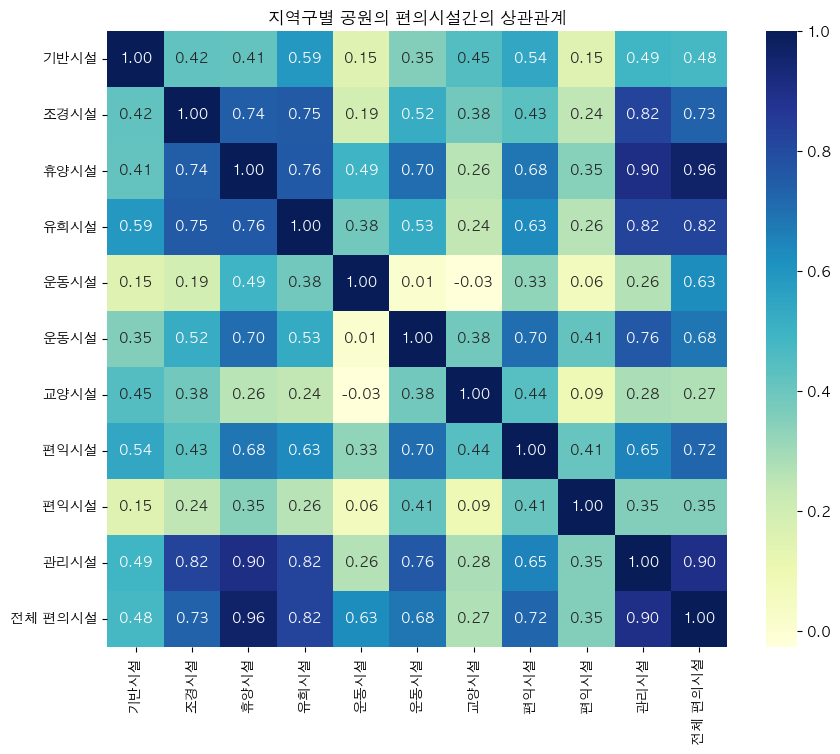

In [132]:
# facilities_df의 상관 행렬 계산
plt.figure(figsize=(10, 8))
correlation_matrix = facilities_df.iloc[:, 1:].corr()

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('지역구별 공원의 편의시설간의 상관관계')
plt.xticks(fontsize=10)  # x축 눈금 폰트 크기 조정
plt.yticks(fontsize=10)  # y축 눈금 폰트 크기 조정
plt.show()

### 데이터프레임 merge

In [133]:
happy_df = regionsub_df.rename({"구분별(2)" : "자치구별"}, axis=1)
happy_df = happy_df.iloc[:, 1:]
happy_df.head()

1,자치구별,소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
26,종로구,6.898380,7.194778,6.531808,6.986164,6.998969,6.780180
27,중구,6.443657,6.792230,6.011363,6.521418,6.500919,6.392356
28,용산구,6.502867,7.126117,6.279551,6.456803,6.386850,6.265015
29,성동구,6.993792,7.587455,6.431605,6.997934,7.025571,6.926396
30,광진구,6.534389,7.093654,6.236090,6.451024,6.554331,6.336849


In [134]:
park_df.head()

1,자치구별,행정구역면적 소계,공원면적 소계,공원면적 공원율 (%)
0,종로구,23913162.0,11434590.0,47.82
1,중구,9960287.0,3206189.0,32.19
2,용산구,21867610.0,1773967.0,8.11
3,성동구,16820272.0,3083766.0,18.33
4,광진구,17062837.0,3459842.0,20.28


In [137]:
park_per_df.head()

1,자치구별,공원 1인당 공원면적 (㎡),도시공원 1인당 공원면적 (㎡),도보생활권공원 1인당 공원면적 (㎡)
0,종로구,75.12,40.97,19.85
1,중구,24.51,23.85,10.63
2,용산구,7.60,3.25,6.91
3,성동구,10.70,4.27,10.08
4,광진구,9.85,8.52,3.85


In [136]:
park_num_df.head()

,자치구별,전체 공원수,전체 공원면적(㎡),도시자연공원구역 공원수,도시자연공원구역 면적(㎡),도시계획시설(공원) 공원수,도시계획시설(공원) 면적(㎡),근린공원 공원수,근린공원 면적(㎡),어린이공원 공원수,어린이공원 면적(㎡),소공원 공원수,소공원 면적(㎡),체육공원 공원수,체육공원 면적(㎡),묘지공원 공원수,묘지공원 면적(㎡),문화공원 공원수,문화공원 면적(㎡),역사공원 공원수,역사공원 면적(㎡),수변공원 공원수,수변공원 면적(㎡),생태공원 공원수,생태공원 면적(㎡),가로공원 공원수,가로공원 면적(㎡),자연공원 공원수,자연공원 면적(㎡),기타공원 공원수,기타공원 면적(㎡)
6,종로구,106.0,11434590.40,3.0,3315969.2,66.0,2920667.60,23.0,2721138.9,20.0,55031.10,16.0,21902.80,0.0,0.0,0.0,0.0,3.0,9581.1,4.0,113013.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5030000.0,37.0,167953.60
7,중구,72.0,3206189.49,1.0,1789845.8,56.0,1329016.40,3.0,1201434.9,16.0,31590.00,28.0,26093.50,1.0,29682.2,0.0,0.0,3.0,5795.7,5.0,34420.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,87327.29
8,용산구,107.0,1773967.16,0.0,54875.3,68.0,702647.56,6.0,555214.1,23.0,41328.86,28.0,47193.20,0.0,0.0,0.0,0.0,6.0,37920.5,3.0,17504.6,0.0,0.0,0.0,0.0,2.0,3486.3,0.0,0.0,39.0,1016444.30
9,성동구,100.0,3083766.47,1.0,72647.9,64.0,1158317.06,10.0,983902.1,32.0,55821.10,16.0,16600.36,1.0,2815.6,0.0,0.0,2.0,90366.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8811.9,0.0,0.0,35.0,1852801.51
10,광진구,68.0,3459841.80,1.0,2097470.0,49.0,896461.10,1.0,837748.7,34.0,40594.20,13.0,14884.20,0.0,0.0,0.0,0.0,1.0,3234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,465910.70


In [138]:
facilities_df.head()

,자치구별,기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설,전체 편의시설
0,종로구,90,106,1545,96,26,943,51,47,85,1380,4369
1,중구,81,40,555,90,5,269,13,16,33,580,1682
2,용산구,35,105,716,152,10,545,68,23,24,927,2605
3,성동구,41,56,1387,288,40,711,2,23,63,1122,3733
4,광진구,30,25,773,214,19,557,4,30,27,835,2514


In [139]:
# 데이터 프레임별 행 수 확인
df_list = [regionsub_df, park_df, park_per_df, park_num_df, facilities_df]

for df in df_list:
    print(len(df))

25
25
25
25
25


In [141]:
# 데이터 프레임들 merge
df = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(happy_df, park_df, on="자치구별"), park_per_df, on="자치구별"
        ),
        park_num_df,
        on="자치구별",
    ),
    facilities_df,
    on="자치구별",
)
df.head()

,자치구별,소계,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활,행정구역면적 소계,공원면적 소계,공원면적 공원율 (%),공원 1인당 공원면적 (㎡),도시공원 1인당 공원면적 (㎡),도보생활권공원 1인당 공원면적 (㎡),전체 공원수,전체 공원면적(㎡),도시자연공원구역 공원수,도시자연공원구역 면적(㎡),도시계획시설(공원) 공원수,도시계획시설(공원) 면적(㎡),근린공원 공원수,근린공원 면적(㎡),어린이공원 공원수,어린이공원 면적(㎡),소공원 공원수,소공원 면적(㎡),체육공원 공원수,체육공원 면적(㎡),묘지공원 공원수,묘지공원 면적(㎡),문화공원 공원수,문화공원 면적(㎡),역사공원 공원수,역사공원 면적(㎡),수변공원 공원수,수변공원 면적(㎡),생태공원 공원수,생태공원 면적(㎡),가로공원 공원수,가로공원 면적(㎡),자연공원 공원수,자연공원 면적(㎡),기타공원 공원수,기타공원 면적(㎡),기반시설,조경시설,휴양시설,유희시설,운동시설,운동시설,교양시설,편익시설,편익시설,관리시설,전체 편의시설
0,종로구,6.898380,7.194778,6.531808,6.986164,6.998969,6.780180,23913162.0,11434590.0,47.82,75.12,40.97,19.85,106.0,11434590.40,3.0,3315969.2,66.0,2920667.60,23.0,2721138.9,20.0,55031.10,16.0,21902.80,0.0,0.0,0.0,0.0,3.0,9581.1,4.0,113013.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5030000.0,37.0,167953.60,90,106,1545,96,26,943,51,47,85,1380,4369
1,중구,6.443657,6.792230,6.011363,6.521418,6.500919,6.392356,9960287.0,3206189.0,32.19,24.51,23.85,10.63,72.0,3206189.49,1.0,1789845.8,56.0,1329016.40,3.0,1201434.9,16.0,31590.00,28.0,26093.50,1.0,29682.2,0.0,0.0,3.0,5795.7,5.0,34420.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,87327.29,81,40,555,90,5,269,13,16,33,580,1682
2,용산구,6.502867,7.126117,6.279551,6.456803,6.386850,6.265015,21867610.0,1773967.0,8.11,7.60,3.25,6.91,107.0,1773967.16,0.0,54875.3,68.0,702647.56,6.0,555214.1,23.0,41328.86,28.0,47193.20,0.0,0.0,0.0,0.0,6.0,37920.5,3.0,17504.6,0.0,0.0,0.0,0.0,2.0,3486.3,0.0,0.0,39.0,1016444.30,35,105,716,152,10,545,68,23,24,927,2605
3,성동구,6.993792,7.587455,6.431605,6.997934,7.025571,6.926396,16820272.0,3083766.0,18.33,10.70,4.27,10.08,100.0,3083766.47,1.0,72647.9,64.0,1158317.06,10.0,983902.1,32.0,55821.10,16.0,16600.36,1.0,2815.6,0.0,0.0,2.0,90366.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8811.9,0.0,0.0,35.0,1852801.51,41,56,1387,288,40,711,2,23,63,1122,3733
4,광진구,6.534389,7.093654,6.236090,6.451024,6.554331,6.336849,17062837.0,3459842.0,20.28,9.85,8.52,3.85,68.0,3459841.80,1.0,2097470.0,49.0,896461.10,1.0,837748.7,34.0,40594.20,13.0,14884.20,0.0,0.0,0.0,0.0,1.0,3234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,465910.70,30,25,773,214,19,557,4,30,27,835,2514


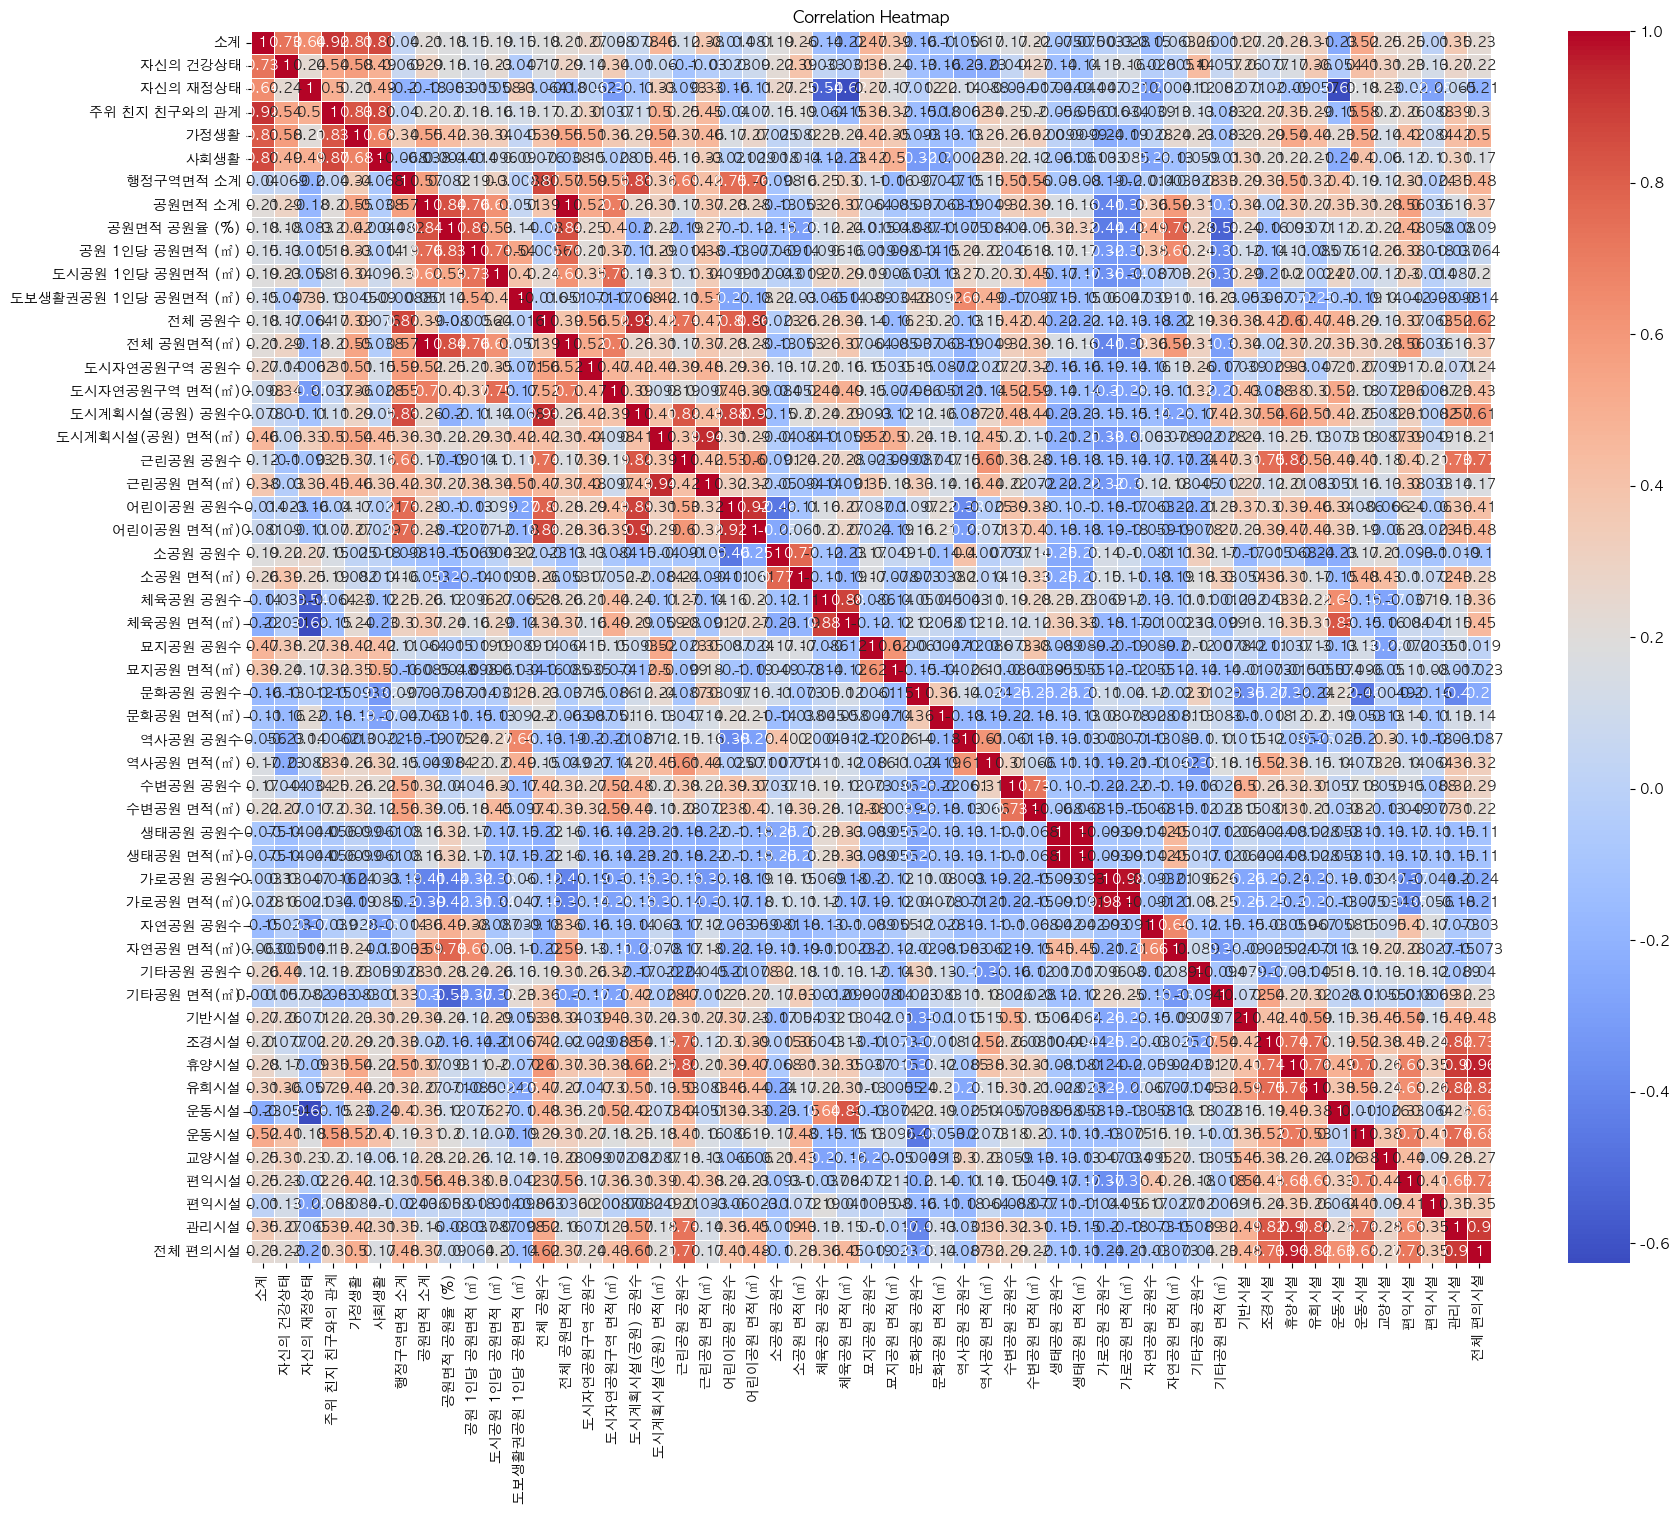

In [155]:
# 상관계수 구하기
correlation_matrix = df.iloc[:,1:].corr()

# 히트맵 그리기
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()